In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.76 s (started: 2021-02-07 23:32:57 +00:00)


In [ ]:
!gdown "https://drive.google.com/uc?id=1j7h-SUy2gMJBds6eQalw4CFZC3O7Pr05"

Downloading...
From: https://drive.google.com/uc?id=1j7h-SUy2gMJBds6eQalw4CFZC3O7Pr05
To: /content/collaboration_network.edgelist
38.8MB [00:00, 147MB/s]
time: 3.26 s (started: 2021-02-07 23:33:00 +00:00)


In [ ]:
!gdown "https://drive.google.com/uc?id=1TD3CkcmbvhIdXkCAWaBpY416qDen2vfD"

Downloading...
From: https://drive.google.com/uc?id=1TD3CkcmbvhIdXkCAWaBpY416qDen2vfD
To: /content/author_papers.txt
23.5MB [00:00, 74.7MB/s]
time: 2.17 s (started: 2021-02-07 23:33:03 +00:00)


In [ ]:
import networkx as nx

G = nx.read_edgelist('collaboration_network.edgelist',
                     delimiter=' ', nodetype=int)

time: 8.02 s (started: 2021-02-07 23:33:06 +00:00)


# Create paper to authors dict

In [ ]:
import ast
from collections import defaultdict
from tqdm.notebook import tqdm


f = open("author_papers.txt", "r")
print("Read author_papers.txt")

# loads the inverted abstracts and stores them as id-abstracts in a dictionary dic and in a folder fw
paper_author = defaultdict(list)
author_paper = defaultdict(list)
for l in tqdm(f):
    if l == "\n":
        continue
    author, paper = l.split(":")
    paper = ast.literal_eval(paper)
    author_paper[int(author)] = paper
    for p in paper:
        paper_author[p].append(int(author))

Read author_papers.txt



time: 11.1 s (started: 2021-02-07 23:33:14 +00:00)


# Update weights of graphs

In [ ]:
from itertools import combinations

for paper, authors in tqdm(paper_author.items()):
    for author_1, author_2 in combinations(authors, 2):
        if not G.has_edge(author_1, author_2):
            G.add_edge(author_1, author_2, weight=1)
        else:
            G[author_1][author_2]["weight"] = 1 + G[author_1][author_2].get("weight", 0)


time: 22.8 s (started: 2021-02-07 23:33:25 +00:00)


In [ ]:
# somehow the above doesn't cover all edges, so we add a weight of 1 to all remaining 
for author_1, author_2, data in tqdm(G.edges(data=True)):
    G[author_1][author_2]["weight"] = G[author_1][author_2].get("weight", 1)


time: 15.1 s (started: 2021-02-07 23:33:48 +00:00)


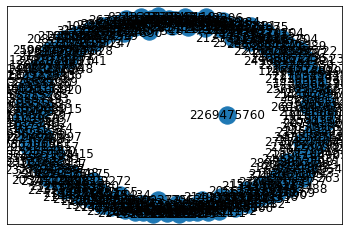

time: 1.41 s (started: 2021-02-07 23:34:03 +00:00)


In [ ]:
from random import sample

random_nodes = sample(list(G.nodes()), G.number_of_nodes() // 1000)
nx.draw_networkx(G.subgraph(random_nodes))

In [ ]:
nx.write_weighted_edgelist(G, "collaboration_network_weighted.edgelist")

time: 8.24 s (started: 2021-02-07 23:34:04 +00:00)


# Normalize edge weights

In [ ]:
import numpy as np
all_weights = np.array([data['weight'] for _, _, data in tqdm(G.edges(data=True))])


time: 6.2 s (started: 2021-02-07 23:22:33 +00:00)


In [ ]:
max(np.unique(all_weights))

28

time: 108 ms (started: 2021-02-07 23:27:28 +00:00)


In [ ]:
from sklearn.preprocessing import StandardScaler

normalized_weights = StandardScaler().fit_transform(all_weights.reshape(1, -1))

time: 1.01 s (started: 2021-02-07 23:26:47 +00:00)


In [ ]:
normalized_weights.reshape(-1)
normalized_weights[:100]

array([[0., 0., 0., ..., 0., 0., 0.]])

time: 3.36 ms (started: 2021-02-07 23:27:08 +00:00)


In [ ]:
for i, (author_1, author_2) in tqdm(enumerate(G.edges())):
    G[author_1][author_2]["weight"] = normalized_weights[i]

# Save back file

In [ ]:
nx.write_weighted_edgelist(G, "collaboration_network_weighted_norm.edgelist")